In [1]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

2023-06-26 11:29:21.705917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 11:29:22.771609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import json
import numpy as np

def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data=json.load(fp)

    inputs=np.array(data['mfcc'])
    targets=np.array(data['labels'])

    return inputs,targets

In [3]:
inputs,targets=load_data('data_project.json')

In [4]:
targets

array([0, 0, 0, ..., 5, 5, 5])

In [5]:
input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.3)

In [6]:
inputs.shape

(5038, 259, 13)

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

2023-06-26 11:29:35.390424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 11:29:35.508175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 11:29:35.508377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,872,582
Trainable params: 1,872,582
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100


2023-06-26 11:29:36.808150: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 11:29:36.906676: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 11:29:38.414516: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x1fad7c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-26 11:29:38.414597: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-06-26 11:29:38.463394: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-26 11:29:38.734382: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-26 11:29:38.999794: I ./tensorflow/compiler/jit/device_compiler.h:1

111/111 [==============================] - 3s 5ms/step - loss: 18.4001 - accuracy: 0.3392 - val_loss: 3.1754 - val_accuracy: 0.4444
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 2.4627 - accuracy: 0.4589 - val_loss: 2.7816 - val_accuracy: 0.3538
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 1.5942 - accuracy: 0.3108 - val_loss: 1.5603 - val_accuracy: 0.3968
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 1.4532 - accuracy: 0.4566 - val_loss: 1.4944 - val_accuracy: 0.4643
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 1.3598 - accuracy: 0.4960 - val_loss: 1.5398 - val_accuracy: 0.4239
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 1.3338 - accuracy: 0.5091 - val_loss: 1.4748 - val_accuracy: 0.4663
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 1.2994 - accuracy: 0.5289 - val_loss: 1.5595 - val_accuracy: 0.4967
Epoch 8/10

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_accuracy_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['accuracy'],label='train_accuracy')
    plt.plot(history_plot['val_accuracy'],label='test_accuracy')
    plt.legend(['train_accuracy','test_accuracy'])
    plt.title("Accuracy curves")
    plt.xlabel("Epochs")

In [21]:
def plot_loss_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['loss'],label='train_loss')
    plt.plot(history_plot['val_loss'],label='test_loss')
    plt.legend(['train_loss','test_loss'])
    plt.title("Loss curves")
    plt.xlabel("Epochs")

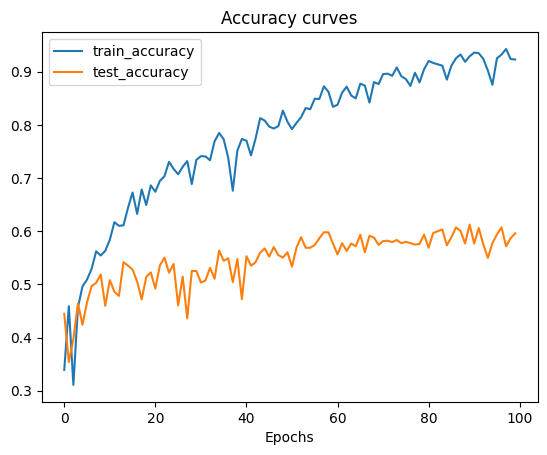

In [22]:
plot_accuracy_curves(history)

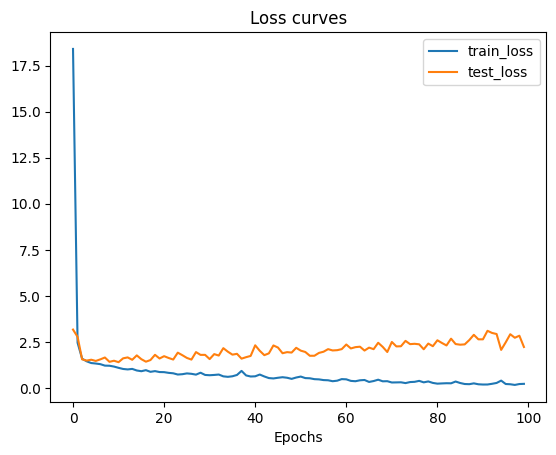

In [23]:
plot_loss_curves(history)

In [54]:
#Reducing neurons, applying dropout and L2 regularization to reduce overfitting

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100
111/111 [==============================] - 1s 4ms/step - loss: 0.0523 - accuracy: 0.9875 - val_loss: 34.9506 - val_accuracy: 0.6164
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9833 - val_loss: 32.5070 - val_accuracy: 0.6071
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.9853 - val_loss: 30.6052 - val_accuracy: 0.6091
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9836 - val_loss: 35.0386 - val_accuracy: 0.6038
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9867 - val_loss: 34.8363 - val_accuracy: 0.5946
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9887 - val_loss: 30.8957 - val_accuracy: 0.6058
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9904 - val_loss: 31.5335 - val_accuracy:

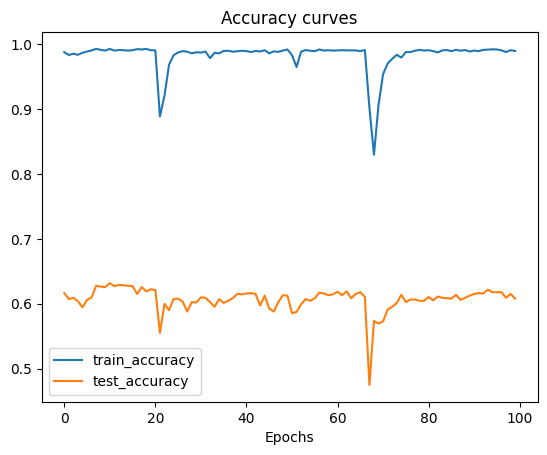

In [55]:
plot_accuracy_curves(history2)

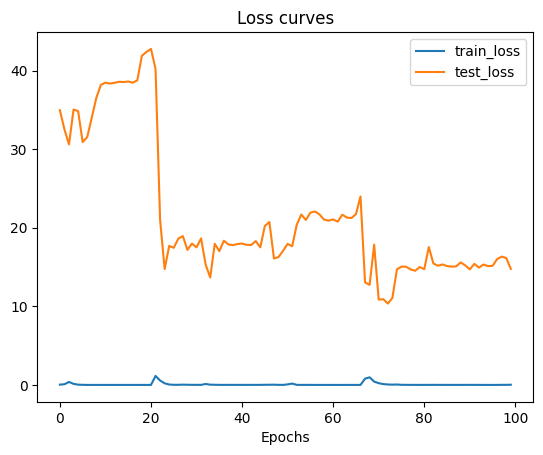

In [56]:
plot_loss_curves(history2)